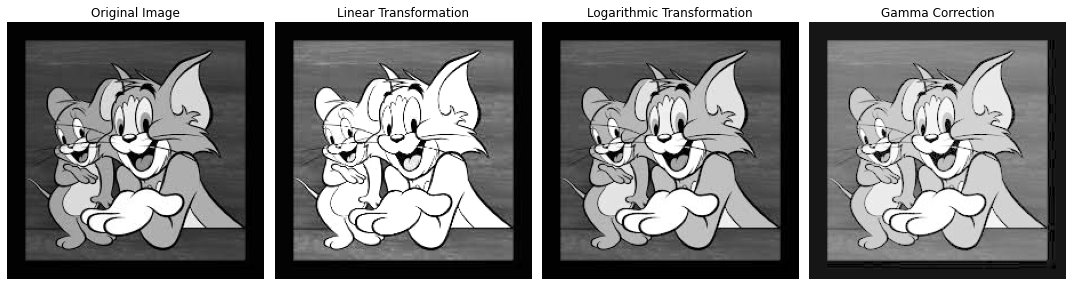

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the input image in grayscale
image_path = 'C:/Users/Student/Documents/Expimage.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Normalize the image to the range [0, 1]
img_normalized = img / 255.0

# Step 3: Apply intensity transformations
# 1. Linear Transformation: s = a * r + b
# Contrast scaling factor (a) and brightness adjustment (b)
a = 1.5  # Increase contrast
b = 20   # Increase brightness
linear_transformed = a * img_normalized + b / 255.0  # Apply linear transformation

# 2. Logarithmic Transformation: s = c * log(1 + r)
# Scaling constant (c) for the logarithmic transformation
c = 1.0  # Log scaling constant
log_transformed = c * np.log(1 + img_normalized)

# 3. Gamma Correction: s = c * r^γ
# Gamma correction factor (γ), γ < 1 brightens the image, γ > 1 darkens it
gamma = 0.5  # Adjust gamma for brightness (γ < 1 brightens)
gamma_transformed = np.power(img_normalized, gamma)

# Step 4: Clip and scale the transformed images back to the range [0, 255]
linear_transformed = np.clip(linear_transformed, 0, 1) * 255
log_transformed = np.clip(log_transformed, 0, 1) * 255
gamma_transformed = np.clip(gamma_transformed, 0, 1) * 255

# Convert to uint8 format for proper image display and saving
linear_transformed = np.uint8(linear_transformed)
log_transformed = np.uint8(log_transformed)
gamma_transformed = np.uint8(gamma_transformed)

# Step 5: Display the original and transformed images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Original image
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Linear Transformation
axes[1].imshow(linear_transformed, cmap='gray')
axes[1].set_title('Linear Transformation')
axes[1].axis('off')

# Logarithmic Transformation
axes[2].imshow(log_transformed, cmap='gray')
axes[2].set_title('Logarithmic Transformation')
axes[2].axis('off')

# Gamma Correction
axes[3].imshow(gamma_transformed, cmap='gray')
axes[3].set_title('Gamma Correction')
axes[3].axis('off')

plt.tight_layout()
plt.show()

# Step 6: Save the transformed images (if needed)
cv2.imwrite('linear_transformed.jpg', linear_transformed)
cv2.imwrite('log_transformed.jpg', log_transformed)
cv2.imwrite('gamma_transformed.jpg', gamma_transformed)